In [1]:
%%html
<style>
table {float: left}
</style>

# Buổi 2. Đọc dữ liệu với Datasets và DataLoaders

* Code đọc và tiền xử lý dữ liệu rắc rối, khó kiểm soát &#8594; tách thành 1 module riêng khỏi code huấn luyện mô hình.
* PyTorch cung cấp 2 lớp:
    - `Dataset`: lưu đặc trưng và nhãn tương ứng của các quan sát
    - `DataLoader`: hỗ trợ các thao tác trên Dataset

## 1. Tự tạo Dataset
- Một đối tượng Dataset cần implement 3 hàm: 
    - `__init__`: Hàm khởi tạo đối tượng
    - `__len__`: Trả về số lượng quan sát trong dataset
    - `__getitem__`: Đọc và trả về 1 quan sát với tham số `idx`
- Tham số đầu vào:
    - ``img_dir``: Đường dẫn thư mục lưu dữ liệu ảnh
    - ``annotations_file``: Đường dẫn của file CSV lưu nhãn có cấu trúc: <br/><br/>
    
        | img_path | value |
        | --- | --- |
        | dog1.jpeg | 0 |
        | cat1.jpeg | 11 |
        | ... | ... |
        |dog3.jpeg | 0 |

In [10]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, header=None)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = cv2.imread(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [14]:
dataset = CustomImageDataset(
    annotations_file='/home/vuluong/Work/youngmonkeys/tutorials/pytorch_101/repo/002/data/dog_cat/labels.csv',
    img_dir='/home/vuluong/Work/youngmonkeys/tutorials/pytorch_101/repo/002/data/dog_cat/images'
)

In [15]:
# dataset[2]

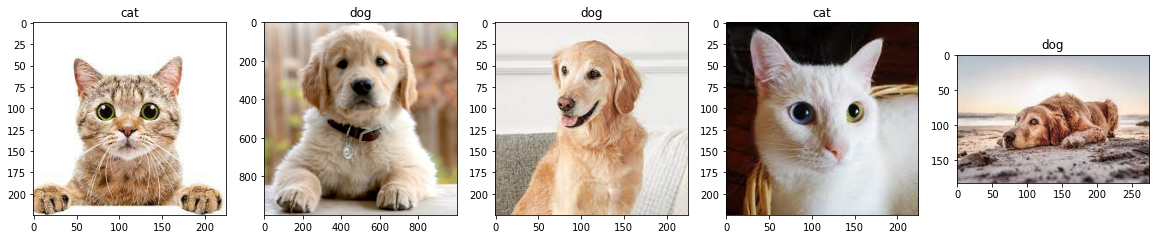

In [16]:
labels = {
    0: 'dog',
    1: 'cat'
}
figure = plt.figure(figsize=(20, 10))
for i in range(dataset.__len__()):
    x, y = dataset[i]
    
    figure.add_subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
    plt.title(labels[y])

## 2. Dữ liệu Fashion-MNIST

- Nguồn: https://research.zalando.com/project/fashion_mnist/fashion_mnist/
- Mỗi quan sát là 1 ảnh 28×28 grayscale được gán nhãn 0-9 tương ứng
- Tập huấn luyện (training set) 60,000 quan sát 
- Tập kiểm thử  (testing set) 10,000 quan sát

| Nhãn (label) | Mô tả |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


In [17]:
training_data = datasets.FashionMNIST(
    root="data", # thư mục lưu dữ liệu
    train=True, # training set hay testing set
    download=True,
    transform=ToTensor() # chuyển dữ liệu về dạng Tensor
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

22.4%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.6%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



119.3%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw




/home/vuluong/anaconda3/envs/machine_learning/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630836880/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## 3. Làm quen dữ liệu Fashion-MNIST

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


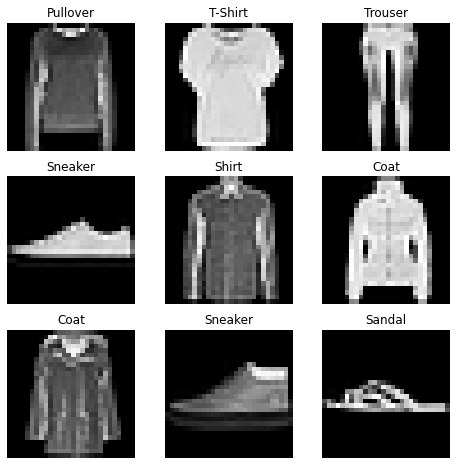

In [19]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    print(img.shape)
    
    # Visualize image
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    
plt.show()

--------------




## 4. Chuẩn bị dữ liệu để huấn luyện với lớp DataLoaders
- Lớp Dataset trả về 1 quan sát mỗi lần. Tuy nhiên, khi huấn luyện mô hình, ta thường cần gom quan sát lại thành batch, xáo trộn dữ liệu sau mỗi epoch, và song song hóa việc đọc dữ liệu.
- Lớp DataLoader đóng gói các thao tác phức tạp trên dưới dạng 1 iterable

### 4.1. Khởi tạo đối tượng DataLoader

In [20]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### 4.2. Duyệt dữ liệu với DataLoader

- Mỗi iteration trả về một batch gồm `batch_size=64` features and labels
- `shuffle=True`: xáo dữ liệu sau khi lặp qua tất cả các batch.


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


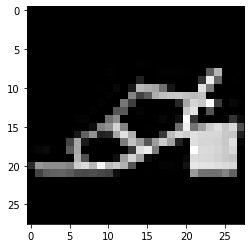

Label: 5


In [23]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")